In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch
import csv
import pickle
import warnings
import time
import scipy
import pickle

<Figure size 432x288 with 0 Axes>

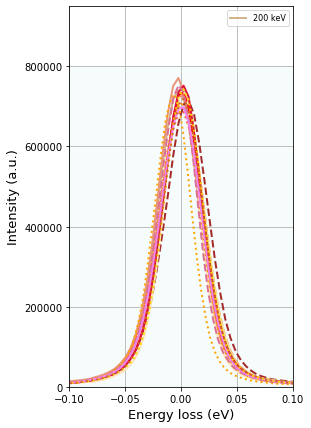

In [8]:
%run EELS-ZLP-Mar.py
%run Functions.ipynb

file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15 = \
pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),\
pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

file1['x'], file1['y'] = ZLP_100_x1, ZLP_100_y1
file2['x'], file2['y'] = ZLP_100_x2, ZLP_100_y2
file3['x'], file3['y'] = ZLP_100_x3, ZLP_100_y3
file4['x'], file4['y'] = ZLP_100_x4, ZLP_100_y4
file5['x'], file5['y'] = ZLP_100_x5, ZLP_100_y5
file6['x'], file6['y'] = ZLP_100_x6, ZLP_100_y6
file7['x'], file7['y'] = ZLP_100_x7, ZLP_100_y7
file8['x'], file8['y'] = ZLP_100_x8, ZLP_100_y8
file9['x'], file9['y'] = ZLP_100_x9, ZLP_100_y9
file10['x'], file10['y'] = ZLP_100_x10, ZLP_100_y10
file11['x'], file11['y'] = ZLP_100_x11, ZLP_100_y11
file12['x'], file12['y'] = ZLP_100_x12, ZLP_100_y12
file13['x'], file13['y'] = ZLP_100_x13, ZLP_100_y13
file14['x'], file14['y'] = ZLP_100_x14, ZLP_100_y14
file15['x'], file15['y'] = ZLP_100_x15, ZLP_100_y15

## Create binned array for each of the 15 data sets
Output: **meanfile** --> contains x, $y^{(exp)}$ 

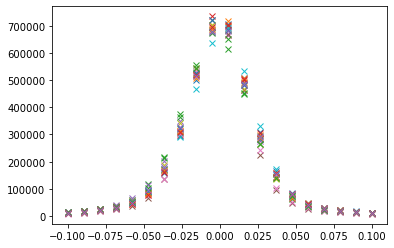

In [9]:
E_min = -0.1
E_max = 0.1
nbins = 20
meanfile = pd.DataFrame()

for i, file in enumerate([file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15]):
    
    zeropoint = file[file['y'] == file['y'].max()]['x']
    file['x_shifted'] = file['x'] - float(zeropoint)
   
    windowfile = file[(file['x_shifted'] > E_min) & (file['x_shifted'] < E_max)]
    x = np.linspace(E_min, E_max, nbins)
    meanfile['y%(s)s' %{"s": i}] = binned_statistics(windowfile.x_shifted, windowfile.y, nbins)[0]
    
    plt.plot(x, meanfile['y%(s)s' %{"s": i}], 'x')

## Create binned array for all data sets together
Output: **meanfile_big** --> contains x, $y^{(exp)}$ and $sigma^{(exp)}$

,x,y,sigma
0,-0.100000,11800.950303,1613.260533
1,-0.089474,15115.745455,2151.134081
2,-0.078947,21113.994444,3069.457006
3,-0.068421,30519.118182,4924.032211
4,-0.057895,48629.918182,9955.658571


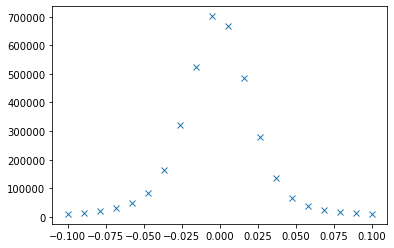

In [10]:
file0 = pd.DataFrame()
meanfile_big = pd.DataFrame()

nbins = 20
E_min = -0.1
E_max = +0.1

for i, files in enumerate([file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12, file13, file14, file15]):
    
    # Shift spectra to have max at dE=0
    zeropoint = files[files['y'] == files['y'].max()]['x']
    files['x_shifted'] = files['x']  - float(zeropoint)
    
    #Create one big datafile from all the spectra
    bigfile = file0.append(files)
    file0 = bigfile
    
#Windo between E_min and E_max
windowfile_big = bigfile[(bigfile['x_shifted'] > E_min) & (bigfile['x_shifted'] < E_max)]
    
meanfile_big['x'] = np.linspace(E_min, E_max, nbins)
meanfile_big['y'] = binned_statistics(windowfile_big.x_shifted, windowfile_big.y, nbins)[0]
meanfile_big['sigma'] = binned_statistics(windowfile_big.x_shifted, windowfile_big.y, nbins)[1]
    
plt.plot(meanfile_big['x'], meanfile_big['y'], 'x')
        
meanfile_big.head()

In [11]:
rho_matrix = np.zeros(shape=(nbins,nbins))
Nsp = 15

for i in range(nbins):
    for j in range(nbins):
        
        rho = np.zeros(shape=(Nsp))
        
        for k in range(Nsp):
            file = meanfile['y%(k)s' %{"k": k}]
            rho_ijk = file[i] * file[j]
            rho[k] = rho_ijk
            
        rho_1 = 1/Nsp * np.sum(rho)
        rho_2 = meanfile_big['y'][i] * meanfile_big['y'][j]
        rho_ij = rho_1 - rho_2
        
        
        rho_matrix[i,j] = rho_ij / (meanfile_big['sigma'][i] * meanfile_big['sigma'][j])

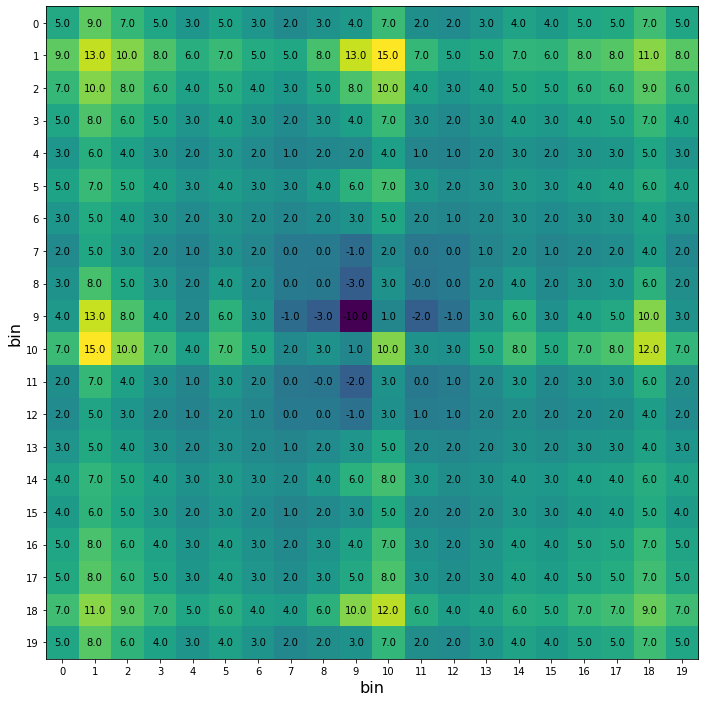

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(rho_matrix)


for i in range(20):
    for j in range(20):
        text = ax.text(j, i, np.round(rho_matrix[i, j], 0),
                       ha="center", va="center", color="black")
        
ax.set_xlabel('bin', fontsize=16)
ax.set_ylabel('bin', fontsize=16)
ax.set_xticks(np.arange(20))
ax.set_yticks(np.arange(20))